In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [4]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [6]:
NUM_CLASSES = 7

# 学習データ読み込み

In [8]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [9]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [13]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    'model/keypoint_classifier/keypoint_classifier.keras', 
    verbose=1, 
    save_weights_only=False
)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [15]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [17]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 12s 403ms/step - accuracy: 0.1406 - loss: 1.8993
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1718 - loss: 1.8411 - val_accuracy: 0.3974 - val_loss: 1.6735
Epoch 2/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2188 - loss: 1.7503
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3083 - loss: 1.6737 - val_accuracy: 0.4538 - val_loss: 1.5727
Epoch 3/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3359 - loss: 1.6083
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3517 - loss: 1.5871 - val_accuracy: 0.5396 - val_loss: 1.4837
Epoch 4/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4141 - loss: 1.4689
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [18]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9367 - loss: 0.3324


In [19]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [20]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.14629166 0.242977   0.08265518 0.00702457 0.51809615 0.00295534]
4


# 混同行列

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


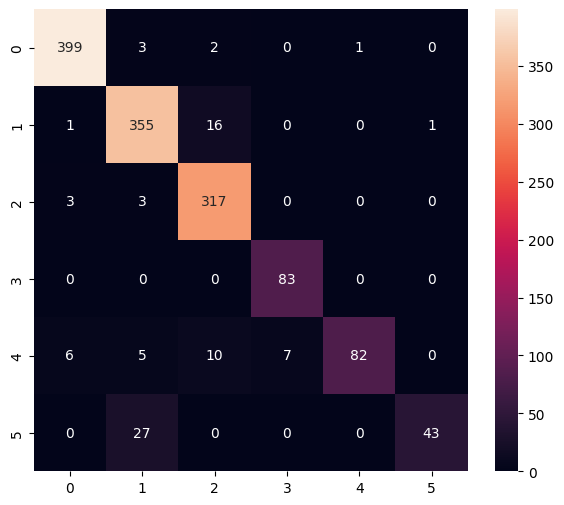

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       405
           1       0.90      0.95      0.93       373
           2       0.92      0.98      0.95       323
           3       0.92      1.00      0.96        83
           4       0.99      0.75      0.85       110
           5       0.98      0.61      0.75        70

    accuracy                           0.94      1364
   macro avg       0.95      0.88      0.90      1364
weighted avg       0.94      0.94      0.93      1364



In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [24]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [25]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/9w/tjsxm7tx04v_y083kvxph2300000gn/T/tmpg7ofdrz1/assets


INFO:tensorflow:Assets written to: /var/folders/9w/tjsxm7tx04v_y083kvxph2300000gn/T/tmpg7ofdrz1/assets


Saved artifact at '/var/folders/9w/tjsxm7tx04v_y083kvxph2300000gn/T/tmpg7ofdrz1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  11529751056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11529757200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11529754320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11529757776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11554358672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11554359056: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1731826082.647982 3764989 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1731826082.648005 3764989 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1731826082.651033 3764989 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


6624

# 推論テスト

In [27]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [28]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [29]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [30]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 41 μs, sys: 28 μs, total: 69 μs
Wall time: 42 μs


In [31]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.14629166 0.24297707 0.0826552  0.00702458 0.5180961  0.00295534]
4
